In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

       rep      prob
0       10  1.000000
1      100  0.420000
2     1000  0.033000
3    10000  0.048100
4   100000  0.012090
5  1000000  0.001745


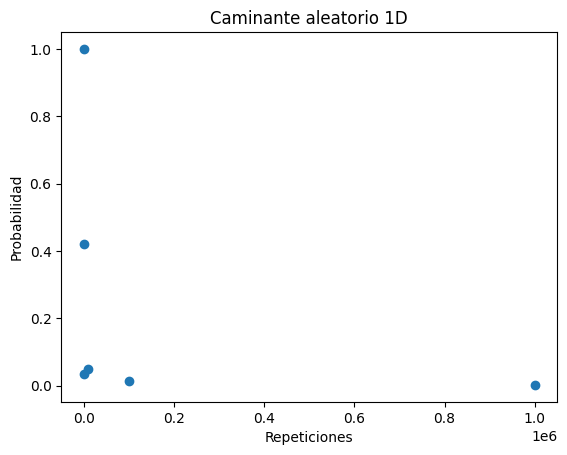

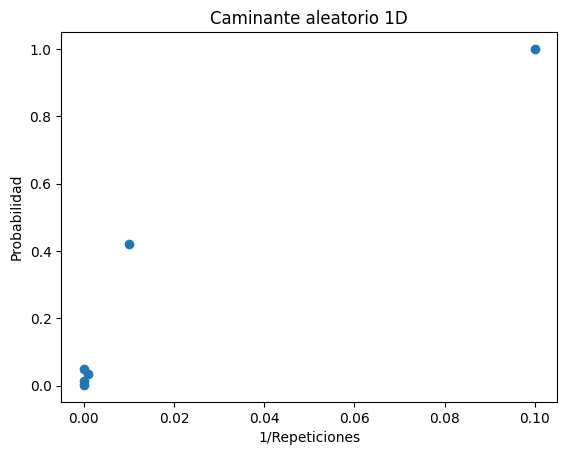

In [43]:
df = pd.read_csv('/home/agustin/Escritorio/Servicio/Notebooks_Py/Datos/caminante1d.csv',sep=",")
print(df)
plt.scatter(df['rep'],df['prob'])
plt.title('Caminante aleatorio 1D')
plt.xlabel('Repeticiones')
plt.ylabel('Probabilidad')
plt.show()

plt.scatter(1/df['rep'],df['prob'])
plt.title('Caminante aleatorio 1D')
plt.xlabel('1/Repeticiones')
plt.ylabel('Probabilidad')
plt.show()